##  Model Training and Evaluation – Breast Cancer Tumor Classifier

In this section, we train three supervised learning models to classify tumors as **benign (0)** or **malignant (1)** using scaled feature inputs:

- **Logistic Regression**
- **Random Forest**
- **XGBoost**

Each model is trained using the same data splits and evaluated using classification metrics and confusion matrix visualizations.

---

###  Machine Learning Pipeline Overview

1. **Import models and evaluation tools**  
2. **Split and scale data (already done)**  
3. **Train classifiers**
4. **Make predictions**
5. **Evaluate using accuracy, classification report, and confusion matrix**

---




 Results for Logistic Regression
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


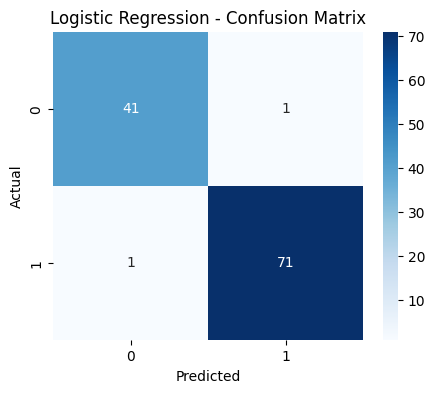


 Results for Random Forest
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



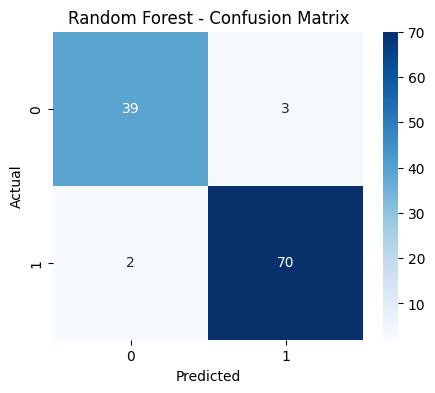


 Results for XGBoost
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



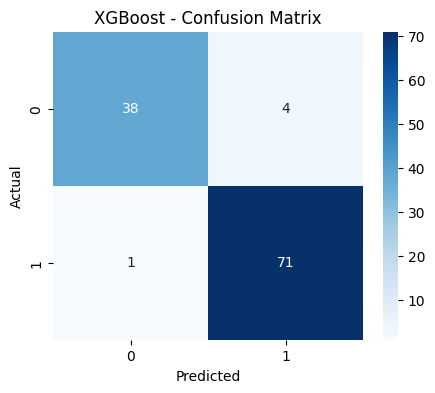

In [2]:
#  Step 3 + Step 4 Combined: Preprocessing + Model Training
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Step 1: Load Dataset ---
file_path = "C:/Users/sanja/1. Breast_Cancer_Tumor_Classifier/1.Breast_Cancer_Tumor_Classifier/data/raw/cancer_classification.csv"
df = pd.read_csv(file_path)

# --- Step 2: Separate Features and Target ---
X = df.drop(columns=['benign_0__mal_1'])
y = df['benign_0__mal_1']

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 4: Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: Train Models ---

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# --- Evaluation Function ---
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n Results for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Evaluate All Models ---
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


##  Saving the Best Model and Scaler

Once we have trained and evaluated our machine learning models, the next step is to **persist the best-performing model** and its associated **scaler**. This enables future inference without retraining the model.

We use the `joblib` library, which is efficient for serializing large NumPy arrays (like those inside scikit-learn models and scalers).

---

###  Save Directory Structure

- **`models/`**: This folder will store:
  - `best_model.pkl` → Trained ML model (e.g., Random Forest)
  - `scaler.pkl` → The `StandardScaler` used to scale input features

---



In [4]:
import os
import joblib

#  Step 1: Create the models directory if it doesn't exist
models_dir = "C:/Users/sanja/1. Breast_Cancer_Tumor_Classifier/models"
os.makedirs(models_dir, exist_ok=True)

#  Step 2: Save the model and scaler
best_model = rf  # or xgb, lr
joblib.dump(best_model, os.path.join(models_dir, "best_model.pkl"))
joblib.dump(scaler, os.path.join(models_dir, "scaler.pkl"))

print(" Model and scaler saved successfully.")



 Model and scaler saved successfully.


## 1. Dataset Overview

In this step, we load the breast cancer classification dataset and display the available columns. This gives us a basic understanding of the diagnostic features and the target variable involved in predicting tumor types.

### Objective
- Load the dataset from the `data/raw` folder.
- Print the list of column names for further exploration and preprocessing.



In [2]:
import pandas as pd

# Load your dataset
file_path = r"C:\Users\sanja\1. Breast_Cancer_Tumor_Classifier\1.Breast_Cancer_Tumor_Classifier\data\raw\cancer_classification.csv"
df = pd.read_csv(file_path)

# Display column names
print("Available columns:")
print(df.columns.tolist())


Available columns:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'benign_0__mal_1']


## 2. Training a Random Forest Classifier

In this step, we build a machine learning model to classify breast cancer tumors as benign (0) or malignant (1) using a Random Forest classifier. This model is trained on diagnostic features from the dataset and evaluated using standard performance metrics.

###  Workflow
1. **Load the dataset**
2. **Split features (`X`) and target (`y`)**
3. **Train-test split** (80% training and 20% testing)
4. **Train a Random Forest classifier**
5. **Evaluate the model**



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = r"C:\Users\sanja\1. Breast_Cancer_Tumor_Classifier\1.Breast_Cancer_Tumor_Classifier\data\raw\cancer_classification.csv"
df = pd.read_csv(file_path)

# View available columns
print("Available columns:\n", df.columns)

# Define feature matrix X (all columns except the target)
X = df.drop(columns=['benign_0__mal_1'])  # Features (predictor variables)

# Define target vector y
y = df['benign_0__mal_1']  # Target labels (0 for benign, 1 for malignant)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Available columns:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

Confusion Matrix:
 [[40  3]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro av

###  Save Model Evaluation Results to File

After training and evaluating our Random Forest Classifier, it's essential to persist the results for future reference, reproducibility, and reporting.

In this section, we:
- Save the **Confusion Matrix**
- Save the **Classification Report** (Precision, Recall, F1-Score)
- Save the **Accuracy Score**

The results will be saved in the `results/` directory inside our project folder structure.

 **Saved File**: `results/rf_results.txt`

 **Steps:**
1. Create the `results` directory if it doesn't already exist.
2. Define the output file path.
3. Save the evaluation metrics to the text file using Python file I/O operations.



In [6]:
import os

# Define the results directory
results_dir = r"C:\Users\sanja\1. Breast_Cancer_Tumor_Classifier\1.Breast_Cancer_Tumor_Classifier\results"
os.makedirs(results_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Define the path to the results file
results_file_path = os.path.join(results_dir, "rf_results.txt")

# Generate evaluation results
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Write results to file
with open(results_file_path, 'w') as f:
    f.write("Random Forest Classifier Results\n")
    f.write("="*40 + "\n")
    f.write("Confusion Matrix:\n")
    f.write(str(conf_matrix) + "\n\n")
    f.write("Classification Report:\n")
    f.write(class_report + "\n")
    f.write("Accuracy Score:\n")
    f.write(str(accuracy) + "\n")

print(f" Results saved to: {results_file_path}")


 Results saved to: C:\Users\sanja\1. Breast_Cancer_Tumor_Classifier\1.Breast_Cancer_Tumor_Classifier\results\rf_results.txt


###  Visualize and Save Confusion Matrix as Image

In this section, we create a **visual representation of the Confusion Matrix** using `matplotlib` and `sklearn` utilities.

 **Why Visualization?**
- Helps in intuitively understanding the classifier’s performance.
- Clearly shows **True Positives**, **True Negatives**, **False Positives**, and **False Negatives**.
- Useful for reports, presentations, and thesis documentation.

 **Saved Location**: `figures/confusion_matrix.png`

 **Steps Performed**:
1. Compute the confusion matrix using test predictions.
2. Use `ConfusionMatrixDisplay` to create a display object.
3. Customize the figure with size, title, and color map.
4. Save the plot into the `figures/` directory.


In [7]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the 'figures/' directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot and save
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")

# Save the figure
plt.savefig("figures/confusion_matrix.png")
plt.close()

print(" Confusion matrix saved as 'figures/confusion_matrix.png'")


 Confusion matrix saved as 'figures/confusion_matrix.png'
